# Simple example

In [3]:
import jax
import numpy as np
from spotter import Star, butterfly
import matplotlib.pyplot as plt

star = Star(N=2**8)
u = [0.4, 0.2]

# spots properties
n = 200
np.random.seed(42)
theta, phi = butterfly(0.25, 0.08, n)
radii = np.random.uniform(0.01, 0.1, n)
contrast = 0.1

# create a map with spots
x = 1 - star.circular_spots(accumulate=True)(theta, phi, radii)[-1] * contrast

# compute light curve
phase = np.linspace(0, 4 * np.pi, 200)
flux = jax.vmap(star.flux, in_axes=(None, None, 0))(x, u, phase)

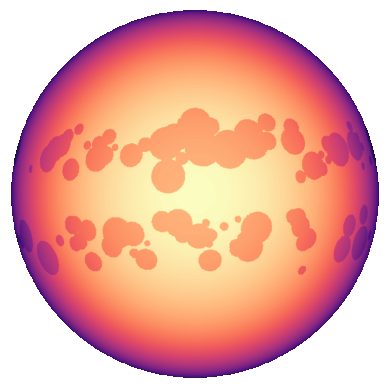

In [4]:
star.show(x, u)

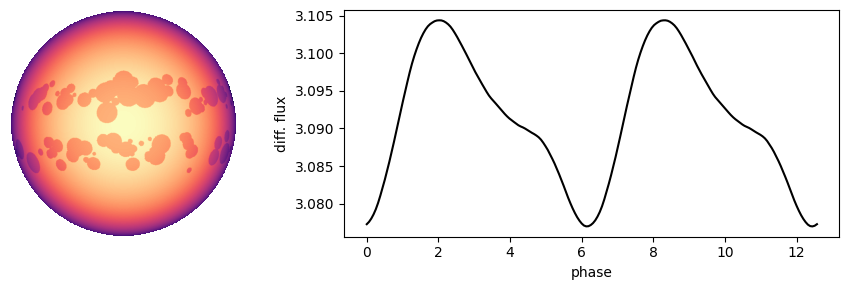

In [5]:
plt.figure(figsize=(9, 3))
plt.subplot(1, 5, (1, 2))
star.show(x, u)

plt.subplot(1, 5, (3, 5))
plt.plot(phase, flux, c="k")
plt.xlabel("phase")
plt.ylabel("diff. flux")

plt.tight_layout()